In [1]:
import torch
from torchvision import datasets

c:\Users\tranq\anaconda3\envs\deep_torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from data.data import data_prep

In [4]:
batch_size = 64
chosen_datasets = datasets.MNIST
_, test_data,_ = data_prep(chosen_datasets, batch_size, shuffle= True, image_size= 32)

Mean of this datasets: tensor([0.1309])
Standard Deviation of this datasets: tensor([0.2893])
train_data (has 60032 items) has been loaded successfully !
test_data (has 10048 items) has been loaded successfully !


In [14]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [15]:
batch = next(iter(test_data))
images, labels = batch
images.shape

torch.Size([64, 1, 32, 32])

In [20]:
from network.lenet import LeNet

In [21]:
model = LeNet(1, 10)
path_to_saved_model = "./network/saved_models/MNIST_LeNet.pth"
model.load_state_dict(torch.load(path_to_saved_model))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[5, 4, 0, 6, 4, 4, 7, 8],
        [1, 4, 3, 5, 7, 1, 7, 1],
        [2, 9, 5, 7, 6, 8, 9, 8],
        [7, 4, 9, 4, 7, 2, 4, 1],
        [0, 0, 2, 4, 6, 8, 4, 1],
        [1, 8, 3, 2, 9, 0, 6, 7],
        [6, 8, 7, 4, 8, 8, 5, 1],
        [8, 8, 9, 6, 1, 9, 3, 0]]) Predictions
------------------------------------------
tensor([[5, 4, 0, 6, 4, 4, 7, 8],
        [1, 4, 3, 5, 2, 1, 7, 1],
        [2, 9, 5, 7, 6, 8, 9, 8],
        [7, 4, 9, 4, 7, 2, 4, 1],
        [0, 0, 2, 4, 6, 8, 4, 1],
        [1, 8, 3, 2, 9, 0, 6, 7],
        [6, 8, 7, 4, 8, 8, 5, 1],
        [8, 8, 9, 6, 1, 9, 3, 0]]) Labels


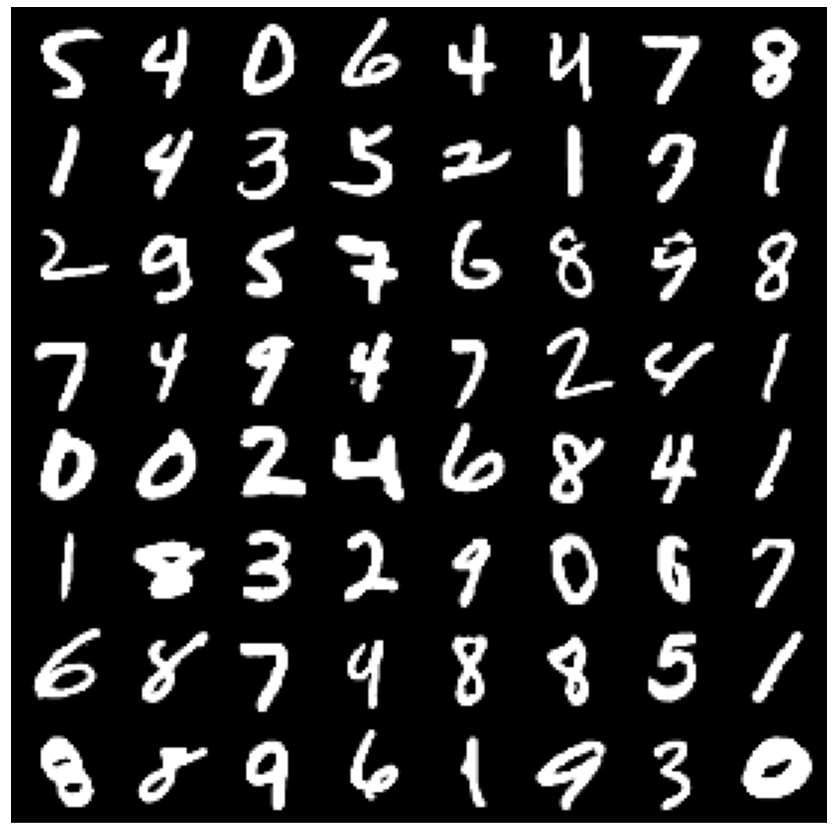

In [38]:
for images, labels in test_data:
    fig, ax = plt.subplots(figsize = (15, 15))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 8).permute(1, 2, 0))
    outputs = model(images)
    reshaped_outputs =  outputs.argmax(dim= 1).reshape(8, 8)
    print(reshaped_outputs, "Predictions")
    print("--------------------------------------------------")
    print(labels.reshape(8, 8), "Labels")
    break
